In [1]:
# Import All Necessary Libraries
import numpy as np
from random import seed, random
from os import makedirs, listdir, path

import matplotlib.pyplot as plt
from matplotlib.image import imread
from shutil import copyfile

from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array

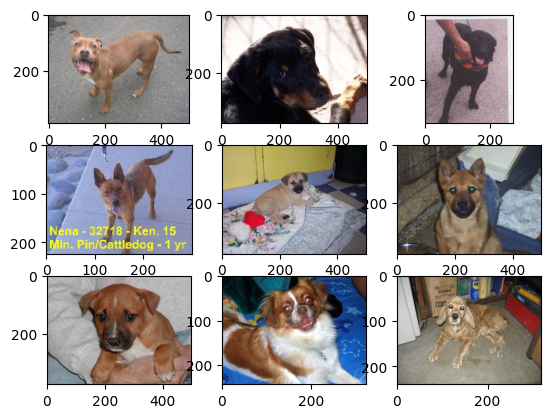

In [2]:
# Define Original Dataset Path
folder = "train/"
image_files = []

# Load Image Files
for filename in listdir(folder):
  if filename.startswith("dog"):
    image_files.append(path.join(folder, filename))

# Sort Image Files
image_files = sorted(image_files)

# Display Image Files
for i in range(9):
  plt.subplot(3, 3, i+1)
  if i < len(image_files):
    image = imread(image_files[i])
    plt.imshow(image)

# Display Figure
plt.show()

In [40]:
# Define New Dataset Path And Subdirectories
dataset_home = "dataset_dogs_vs_cats/"
subdirs = ['train/', 'test/']

# Create Subdirectories
for subdir in subdirs:
  labeldirs = ['dogs/', 'cats/']

  for labeldir in labeldirs:
    newdir = f"{dataset_home}{subdir}{labeldir}"
    makedirs(newdir, exist_ok=True)

seed(1) # Seed Random Number Generator

val_ratio = 0.25 # Validation Ratio

src_directory = "train/" # Source Directory

# Copy Files To New Directories
for file in listdir(src_directory):
  src = f"{src_directory}{file}"
  dst_dir = src_directory
  if random() < val_ratio:
    dst_dir = "test/"
  if file.startswith("cat"):
    dst = f"{dataset_home}{dst_dir}cats/{file}"
    copyfile(src, dst)
  elif file.startswith("dog"):
    dst = f"{dataset_home}{dst_dir}dogs/{file}"
    copyfile(src, dst)

In [54]:
# Define Model
def define_model():
  # Load VGG16 Model
  model = VGG16(include_top=False, input_shape=(224, 224, 3))

  # Mark Loaded Layers As Not Trainable
  for layer in model.layers:
    layer.trainable = False

  # Add New Classifier Layers
  flat1 = Flatten()(model.layers[-1].output)
  class1 = Dense(128, activation='relu', kernel_initializer='he_uniform')(flat1)
  output = Dense(1, activation='sigmoid')(class1)

  # Define New Model
  model = Model(inputs=model.inputs, outputs=output)

  # Compile Model
  opt = SGD(learning_rate=0.001, momentum=0.9)
  model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
  return model

# Define Test Harness
def run_test_harness():
  # Define Model
  model = define_model()

  # Create Data Generator
  datagen = ImageDataGenerator(featurewise_center=True)

  # Specify Mean Values For Centering
  datagen.mean = [123.68, 116.779, 103.939]

  # Prepare Train Set
  train_it = datagen.flow_from_directory(
    'dataset_dogs_vs_cats/train/', 
    class_mode='binary', 
    batch_size=128, 
    target_size=(224, 224)
  )

  # Prepare Test Set
  test_it = datagen.flow_from_directory(
    'dataset_dogs_vs_cats/test/',
    class_mode='binary',
    batch_size=128,
    target_size=(224, 224)
  )

  # Fit Model
  model.fit(
    train_it,
    validation_data=test_it,
    steps_per_epoch=len(train_it), 
    validation_steps=len(test_it),
    epochs=50, 
    verbose=1)

  # Save Model
  model.save('final_model.keras')

# Run Test Harness
run_test_harness()

Found 123 images belonging to 2 classes.
Found 48 images belonging to 2 classes.
Epoch 1/50


c:\Users\Adrian Danao\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
c:\Users\Adrian Danao\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\models\functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['keras_tensor_1706']. Received: the structure of inputs=*
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - accuracy: 0.6423 - loss: 4.6654 - val_accuracy: 0.4792 - val_loss: 24.1940
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 3/50


c:\Users\Adrian Danao\AppData\Local\Programs\Python\Python312\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.3821 - loss: 27.9794 - val_accuracy: 0.9583 - val_loss: 0.2716
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.9837 - loss: 0.1584 - val_accuracy: 0.6875 - val_loss: 6.2029
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.8618 - loss: 2.8914 - val_accuracy: 0.6458 - val_loss: 6.9188
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.8780 - loss: 1.6475 - val_accuracy: 0.7500 - val_loss: 3.0633
Epoch 10/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 11/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.9837 - loss: 0.2061 - val_accuracy: 0.8958 - val_loss: 0.9757
Epoch 12/50
1/1 ━━━━━━━━━━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step


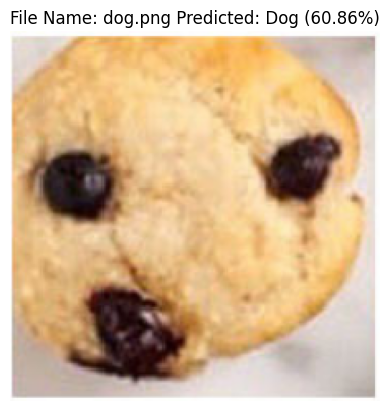

In [3]:
# Load And Prepare Image
def load_image(filename):
  # Load Image
  img = load_img(filename, target_size=(224, 224))

  # Convert To Array
  img = img_to_array(img)

  # Reshape Into A Single Sample With 3 Channels
  img = img.reshape(1, 224, 224, 3)

  # Center Pixel Data
  img = img.astype('float32')
  img = img - [123.68, 116.779, 103.939]
  return img

# Run Example
def run_example(filename):
  # Load Image
  img = load_image(filename)
  # Load Model
  model = load_model('final_model.keras')
  # Predict The Class
  result = model.predict(img)

  # Print Result
  categories = ["Dog", "Cat"]
  predicted_class = np.argmax(result[0])
  predicted_label = categories[predicted_class]
  predicted_percentage = result[0][predicted_class] * 100

  if predicted_percentage > 50:
    predicted_label = categories[predicted_class]
  else:
    predicted_label = "Cat"

  # Display Image
  original_img = load_img(filename, target_size=(224, 224))
  plt.imshow(original_img)
  plt.title(f"File Name: {filename.split("/")[-1]} Predicted: {predicted_label} ({predicted_percentage:.2f}%)")
  plt.axis('off')
  plt.show()

run_example("dog.png")